# Analisis Trending Video Youtube Indonesia

## Kelompok ANAK SD
- Hafiz Bhadrika Alamsyah (1906399650)
- Nofaldi Fikrul Atmam (1906398420)
- Dzikri Qalam Hatorangan (2006595854)

## Data Set
“Starter: Indonesia’s Trending YouTube 298d8341-4” <br/>
https://www.kaggle.com/code/kerneler/starter-indonesia-s-trending-youtube-298d8341-4/data

## Import Section

In [143]:
import pandas as pd
from isodate import parse_duration
import seaborn as sns
import matplotlib.pyplot as plt
from dateutil.parser import parse
import datetime as dt
from wordcloud import WordCloud

## Pre Defined Function

> Menghitung unique value pada kolom

In [3]:
def count_unique(cols):
    print("<-- Unique Value Counter -->")
    for x in cols:
        uq = data[x].unique()
        print(f"{x} - {len(uq)} value")

In [134]:
def parse_interval(pub, tren):
    return (parse(tren) - parse(pub)).total_seconds()

## Data Cleaning

In [4]:
# Import data
data = pd.read_csv('trending.csv')
data.head()

/var/folders/mz/1l3fv5hn18v74489wk7zp94m0000gp/T/ipykernel_8044/4111168274.py:2: DtypeWarning: Columns (0,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('trending.csv')


,video_id,publish_time,channel_id,title,description,thumbnail_url,thumbnail_width,thumbnail_height,channel_name,tags,...,caption,license_status,allowed_region,blocked_region,view,like,dislike,favorite,comment,trending_time
0,NaN,2021-02-05T09:00:34Z,UCEf_Bc-KVd7onSeifS3py9g,aespa 에스파 'Forever (약속)' MV,"aespa's new single ""Forever"" is out!\nListen a...",NaN,NaN,NaN,SMTOWN,NaN,...,True,True,NaN,NaN,7806846.0,857902.0,24078.0,0,94961.0,2021-02-07 05:46:51.832614+00:00
1,NaN,2021-02-04T15:54:08Z,UCYEa4_MC7OFjcWrO6SO-u8g,[FULL] Siapa di Balik Kudeta AHY? | Dua Sisi t...,"Jakarta, https://www.tvonenews.com - Ketua umu...",NaN,NaN,NaN,Indonesia Lawyers Club,"['tvone', 'tv one', 'tvonenews', 'indonesia la...",...,False,True,NaN,NaN,885038.0,6765.0,1263.0,0,6365.0,2021-02-07 05:46:51.832649+00:00
2,NaN,2021-02-06T03:00:22Z,UCu12RxQjRQyh79YBYvEDkOg,CABRIOLET CHALLENGE: TANTANGAN MENGGODA (7/12),Road Party Season 2: Cabriolet Challenge\n\nEp...,NaN,NaN,NaN,Motomobi,"['MotoMobi', 'Mobil', 'motor', 'review', 'indo...",...,False,True,NaN,NaN,889708.0,47895.0,532.0,0,8785.0,2021-02-07 05:46:51.832664+00:00
3,NaN,2021-02-05T20:26:08Z,UCCuzDCoI3EUOo_nhCj4noSw,With Windah Basudara & Hans,Join this channel to get access to perks:\nhtt...,NaN,NaN,NaN,yb,NaN,...,False,True,NaN,NaN,1006854.0,91973.0,3967.0,0,12957.0,2021-02-07 05:46:51.832678+00:00
4,NaN,2021-02-03T23:14:54Z,UC14UlmYlSNiQCBe9Eookf_A,🤯 LATE COMEBACK DRAMA! | HIGHLIGHTS | Granada ...,"With just two minutes to play, Barça looked to...",NaN,NaN,NaN,FC Barcelona,"['FC Barcelona', 'برشلونة،', 'Fútbol', 'FUTBOL...",...,False,True,NaN,NaN,6275035.0,218131.0,4289.0,0,12799.0,2021-02-07 05:46:51.832730+00:00


In [5]:
# Check total rows and columns
print(f"{data.shape[0]} row and {data.shape[1]} column")

87172 row and 27 column


In [6]:
# Data set information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87172 entries, 0 to 87171
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   video_id           34050 non-null  object 
 1   publish_time       87172 non-null  object 
 2   channel_id         87172 non-null  object 
 3   title              87172 non-null  object 
 4   description        83394 non-null  object 
 5   thumbnail_url      34050 non-null  object 
 6   thumbnail_width    34050 non-null  float64
 7   thumbnail_height   34050 non-null  float64
 8   channel_name       87172 non-null  object 
 9   tags               75046 non-null  object 
 10  category_id        87172 non-null  int64  
 11  live_status        87172 non-null  object 
 12  local_title        87172 non-null  object 
 13  local_description  83394 non-null  object 
 14  duration           87172 non-null  object 
 15  dimension          87172 non-null  object 
 16  definition         871

In [7]:
# Data set description
data.describe()

,thumbnail_width,thumbnail_height,category_id,view,like,dislike,favorite,comment
count,34050.0,34050.0,87172.000000,8.716200e+04,8.633100e+04,53630.000000,87172.0,8.678800e+04
mean,480.0,360.0,18.579326,3.762438e+06,1.755848e+05,4561.291535,0.0,1.427810e+04
std,0.0,0.0,6.985279,1.200179e+07,6.273486e+05,17034.843541,0.0,1.361006e+05
min,480.0,360.0,1.000000,1.528200e+04,1.600000e+01,0.000000,0.0,0.000000e+00
25%,480.0,360.0,10.000000,3.945315e+05,9.341500e+03,190.000000,0.0,5.907500e+02
50%,480.0,360.0,22.000000,1.023036e+06,2.889900e+04,578.000000,0.0,1.843000e+03
75%,480.0,360.0,24.000000,2.579029e+06,9.922000e+04,1999.000000,0.0,5.677000e+03
max,480.0,360.0,29.000000,3.359576e+08,1.700526e+07,433282.000000,0.0,7.195733e+06


In [8]:
# Show unique values of each columns
count_unique(data.columns)

<-- Unique Value Counter -->
video_id - 5234 value
publish_time - 15875 value
channel_id - 2575 value
title - 16297 value
description - 14370 value
thumbnail_url - 5234 value
thumbnail_width - 2 value
thumbnail_height - 2 value
channel_name - 2629 value
tags - 10233 value
category_id - 15 value
live_status - 1 value
local_title - 16297 value
local_description - 14370 value
duration - 3434 value
dimension - 1 value
definition - 2 value
caption - 2 value
license_status - 2 value
allowed_region - 75 value
blocked_region - 141 value
view - 85908 value
like - 60180 value
dislike - 10618 value
favorite - 1 value
comment - 20876 value
trending_time - 87172 value


> Beberapa kolom akan di remove karena unique valuenya yang sedikit jadi tidak relevan, kolom tersbut antara lain *thumbnail_width*, *thumbnail_height*, *live_status*, *dimension*, *allow_region*, *blocked_region*, *favorite*

In [9]:
data = data.drop(['thumbnail_width', 'thumbnail_height', 'live_status', 'dimension', 'allowed_region', 'blocked_region', 'favorite'], axis=1)
data.head()

,video_id,publish_time,channel_id,title,description,thumbnail_url,channel_name,tags,category_id,local_title,local_description,duration,definition,caption,license_status,view,like,dislike,comment,trending_time
0,NaN,2021-02-05T09:00:34Z,UCEf_Bc-KVd7onSeifS3py9g,aespa 에스파 'Forever (약속)' MV,"aespa's new single ""Forever"" is out!\nListen a...",NaN,SMTOWN,NaN,10,aespa 에스파 'Forever (약속)' MV,"aespa's new single ""Forever"" is out!\nListen a...",PT5M7S,hd,True,True,7806846.0,857902.0,24078.0,94961.0,2021-02-07 05:46:51.832614+00:00
1,NaN,2021-02-04T15:54:08Z,UCYEa4_MC7OFjcWrO6SO-u8g,[FULL] Siapa di Balik Kudeta AHY? | Dua Sisi t...,"Jakarta, https://www.tvonenews.com - Ketua umu...",NaN,Indonesia Lawyers Club,"['tvone', 'tv one', 'tvonenews', 'indonesia la...",25,[FULL] Siapa di Balik Kudeta AHY? | Dua Sisi t...,"Jakarta, https://www.tvonenews.com - Ketua umu...",PT42M30S,hd,False,True,885038.0,6765.0,1263.0,6365.0,2021-02-07 05:46:51.832649+00:00
2,NaN,2021-02-06T03:00:22Z,UCu12RxQjRQyh79YBYvEDkOg,CABRIOLET CHALLENGE: TANTANGAN MENGGODA (7/12),Road Party Season 2: Cabriolet Challenge\n\nEp...,NaN,Motomobi,"['MotoMobi', 'Mobil', 'motor', 'review', 'indo...",2,CABRIOLET CHALLENGE: TANTANGAN MENGGODA (7/12),Road Party Season 2: Cabriolet Challenge\n\nEp...,PT46M43S,hd,False,True,889708.0,47895.0,532.0,8785.0,2021-02-07 05:46:51.832664+00:00
3,NaN,2021-02-05T20:26:08Z,UCCuzDCoI3EUOo_nhCj4noSw,With Windah Basudara & Hans,Join this channel to get access to perks:\nhtt...,NaN,yb,NaN,20,With Windah Basudara & Hans,Join this channel to get access to perks:\nhtt...,PT45M59S,hd,False,True,1006854.0,91973.0,3967.0,12957.0,2021-02-07 05:46:51.832678+00:00
4,NaN,2021-02-03T23:14:54Z,UC14UlmYlSNiQCBe9Eookf_A,🤯 LATE COMEBACK DRAMA! | HIGHLIGHTS | Granada ...,"With just two minutes to play, Barça looked to...",NaN,FC Barcelona,"['FC Barcelona', 'برشلونة،', 'Fútbol', 'FUTBOL...",17,🤯 LATE COMEBACK DRAMA! | HIGHLIGHTS | Granada ...,"With just two minutes to play, Barça looked to...",PT5M12S,hd,False,True,6275035.0,218131.0,4289.0,12799.0,2021-02-07 05:46:51.832730+00:00


In [10]:
# Check for null value
data.isnull().sum()

video_id             53122
publish_time             0
channel_id               0
title                    0
description           3778
thumbnail_url        53122
channel_name             0
tags                 12126
category_id              0
local_title              0
local_description     3778
duration                 0
definition               0
caption                  0
license_status           0
view                    10
like                   841
dislike              33542
comment                384
trending_time            0
dtype: int64

> Beberap kolom akan di drop karena null value yang terlalu banyak dan menurut kami kurang relevan kegunaanya pada eksperimen kami, kolomnya antara lain *video_id*, *description*, *thumbnail_url*, *tags*, *local_title*, *local_description*, *channel_id*

In [11]:
data = data.drop(['video_id', 'description', 'thumbnail_url', 'tags', 'local_title', 'local_description', 'channel_id'], axis=1)
data.head()

,publish_time,title,channel_name,category_id,duration,definition,caption,license_status,view,like,dislike,comment,trending_time
0,2021-02-05T09:00:34Z,aespa 에스파 'Forever (약속)' MV,SMTOWN,10,PT5M7S,hd,True,True,7806846.0,857902.0,24078.0,94961.0,2021-02-07 05:46:51.832614+00:00
1,2021-02-04T15:54:08Z,[FULL] Siapa di Balik Kudeta AHY? | Dua Sisi t...,Indonesia Lawyers Club,25,PT42M30S,hd,False,True,885038.0,6765.0,1263.0,6365.0,2021-02-07 05:46:51.832649+00:00
2,2021-02-06T03:00:22Z,CABRIOLET CHALLENGE: TANTANGAN MENGGODA (7/12),Motomobi,2,PT46M43S,hd,False,True,889708.0,47895.0,532.0,8785.0,2021-02-07 05:46:51.832664+00:00
3,2021-02-05T20:26:08Z,With Windah Basudara & Hans,yb,20,PT45M59S,hd,False,True,1006854.0,91973.0,3967.0,12957.0,2021-02-07 05:46:51.832678+00:00
4,2021-02-03T23:14:54Z,🤯 LATE COMEBACK DRAMA! | HIGHLIGHTS | Granada ...,FC Barcelona,17,PT5M12S,hd,False,True,6275035.0,218131.0,4289.0,12799.0,2021-02-07 05:46:51.832730+00:00


In [12]:
# Check for null again
data.isnull().sum()

publish_time          0
title                 0
channel_name          0
category_id           0
duration              0
definition            0
caption               0
license_status        0
view                 10
like                841
dislike           33542
comment             384
trending_time         0
dtype: int64

> Untuk view, like, dislike dan comment kita akan mengisi null value menggunakan rata-rata dari kolom tersebut

In [13]:
# Count mean
view_mean = data['view'].mean()
like_mean = data['like'].mean()
dislike_mean = data['dislike'].mean()
comment_mean = data['comment'].mean()

# Fill null value
data['view'].fillna(value=view_mean, inplace=True)
data['like'].fillna(value=like_mean, inplace=True)
data['dislike'].fillna(value=dislike_mean, inplace=True)
data['comment'].fillna(value=comment_mean, inplace=True)

data.isnull().sum()

publish_time      0
title             0
channel_name      0
category_id       0
duration          0
definition        0
caption           0
license_status    0
view              0
like              0
dislike           0
comment           0
trending_time     0
dtype: int64

In [14]:
# Check definition unique value
data.definition.unique()

array(['hd', 'sd'], dtype=object)

> Untuk kolom definition, caption dan license_status yang tipenya binomial akan kita ubah menjadi numerikal 0 dan 1

In [15]:
# Replacing categorical to numerical
data['definition'].replace(['hd', 'sd'], [0, 1], inplace=True)
data['caption'] = data['caption'].astype(int)
data['license_status'] = data['license_status'].astype(int)

data.head()

,publish_time,title,channel_name,category_id,duration,definition,caption,license_status,view,like,dislike,comment,trending_time
0,2021-02-05T09:00:34Z,aespa 에스파 'Forever (약속)' MV,SMTOWN,10,PT5M7S,0,1,1,7806846.0,857902.0,24078.0,94961.0,2021-02-07 05:46:51.832614+00:00
1,2021-02-04T15:54:08Z,[FULL] Siapa di Balik Kudeta AHY? | Dua Sisi t...,Indonesia Lawyers Club,25,PT42M30S,0,0,1,885038.0,6765.0,1263.0,6365.0,2021-02-07 05:46:51.832649+00:00
2,2021-02-06T03:00:22Z,CABRIOLET CHALLENGE: TANTANGAN MENGGODA (7/12),Motomobi,2,PT46M43S,0,0,1,889708.0,47895.0,532.0,8785.0,2021-02-07 05:46:51.832664+00:00
3,2021-02-05T20:26:08Z,With Windah Basudara & Hans,yb,20,PT45M59S,0,0,1,1006854.0,91973.0,3967.0,12957.0,2021-02-07 05:46:51.832678+00:00
4,2021-02-03T23:14:54Z,🤯 LATE COMEBACK DRAMA! | HIGHLIGHTS | Granada ...,FC Barcelona,17,PT5M12S,0,0,1,6275035.0,218131.0,4289.0,12799.0,2021-02-07 05:46:51.832730+00:00


> Karena duration formatnya masih sesuai standar youtube akan kita ubah menjadi detik

In [16]:
# Check for duplicate
data.duplicated().sum()

0

> Dapat kita lihat tidak ada data yang duplikat

In [18]:
for i in range(len(data['duration'])):
    data['duration'][i] = parse_duration(data['duration'][i]).total_seconds()

data.head()

/var/folders/mz/1l3fv5hn18v74489wk7zp94m0000gp/T/ipykernel_8044/647008316.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['duration'][i] = parse_duration(data['duration'][i]).total_seconds()


,publish_time,title,channel_name,category_id,duration,definition,caption,license_status,view,like,dislike,comment,trending_time
0,2021-02-05T09:00:34Z,aespa 에스파 'Forever (약속)' MV,SMTOWN,10,307.0,0,1,1,7806846.0,857902.0,24078.0,94961.0,2021-02-07 05:46:51.832614+00:00
1,2021-02-04T15:54:08Z,[FULL] Siapa di Balik Kudeta AHY? | Dua Sisi t...,Indonesia Lawyers Club,25,2550.0,0,0,1,885038.0,6765.0,1263.0,6365.0,2021-02-07 05:46:51.832649+00:00
2,2021-02-06T03:00:22Z,CABRIOLET CHALLENGE: TANTANGAN MENGGODA (7/12),Motomobi,2,2803.0,0,0,1,889708.0,47895.0,532.0,8785.0,2021-02-07 05:46:51.832664+00:00
3,2021-02-05T20:26:08Z,With Windah Basudara & Hans,yb,20,2759.0,0,0,1,1006854.0,91973.0,3967.0,12957.0,2021-02-07 05:46:51.832678+00:00
4,2021-02-03T23:14:54Z,🤯 LATE COMEBACK DRAMA! | HIGHLIGHTS | Granada ...,FC Barcelona,17,312.0,0,0,1,6275035.0,218131.0,4289.0,12799.0,2021-02-07 05:46:51.832730+00:00


## Exploratory Data Analysis

### Kategori video trending mana yang memiliki rata-rata view paling banyak

In [86]:
# Group view based on category
group_cat = data[['category_id', 'view']].copy()
group_cat.groupby(['category_id']).mean()

,view
category_id,
1,3.313833e+06
2,6.934077e+05
10,5.135872e+06
15,3.921424e+06
17,4.213921e+06
19,9.418807e+05
20,1.712258e+06
22,3.171201e+06
23,8.442261e+06


> Data sudah kitakelompokan sesuai dengan kategorinya, sekaran akan kita tampilkan sebagai boxplot

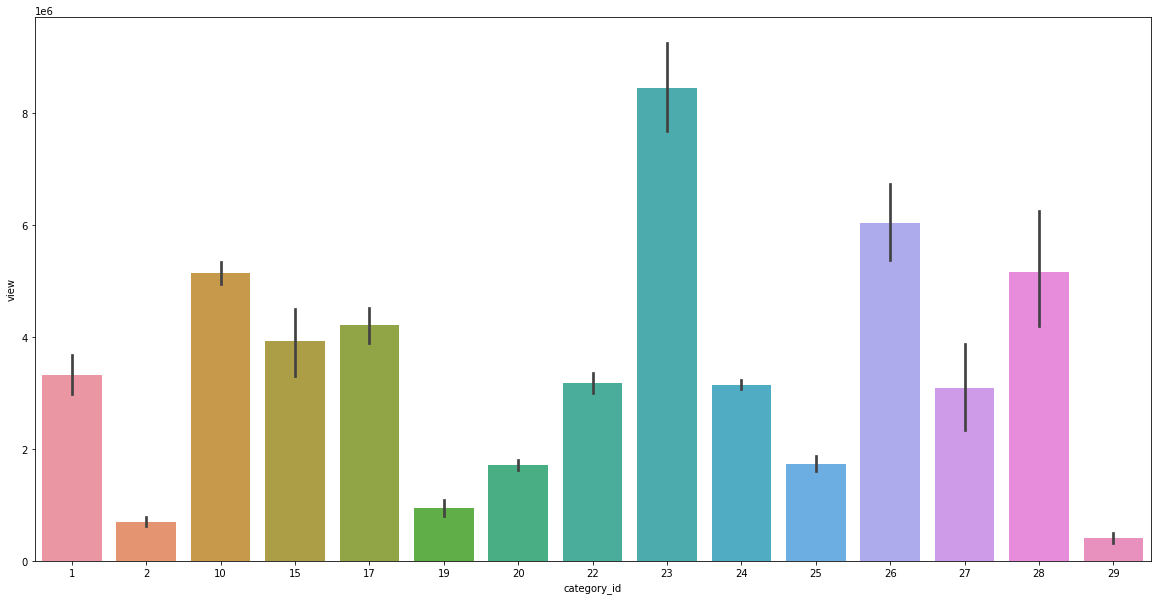

In [87]:
plt.figure(figsize=(20,10))
sns.barplot(x='category_id', y='view',data=group_cat, dodge=False)
plt.show()

> Berdasarkan tampilan dari barplot di atas dapat kita lihat bahwa kategori yang memiliki rata-rata view paling banyak adalah kategori dengan id 23.

> Berdasarkan sumber dari youtube API https://gist.github.com/dgp/1b24bf2961521bd75d6c kategori dengan id 23 adalah kategori komedi

### Channel youtube mana yang memiliki video trending paling banyak berdasarkan kategori video

In [79]:
# Group by channel name and category
chanel_group = data[['channel_name', 'category_id']].copy()
channnel_group_mode = chanel_group.groupby(['category_id'], as_index=False).agg(pd.Series.mode)
channnel_group_mode['count'] = 0

for i in range(len(channnel_group_mode['channel_name'])):
    channnel_group_mode['count'][i] = chanel_group[chanel_group['channel_name'] == channnel_group_mode['channel_name'][i]].count().values[0]

channnel_group_mode = channnel_group_mode.sort_values(by=['count'], ascending=False)
channnel_group_mode


/var/folders/mz/1l3fv5hn18v74489wk7zp94m0000gp/T/ipykernel_8044/2978871402.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  channnel_group_mode['count'][i] = chanel_group[chanel_group['channel_name'] == channnel_group_mode['channel_name'][i]].count().values[0]


,category_id,channel_name,count
9,24,Deddy Corbuzier,756
2,10,SMTOWN,509
8,23,WARINTIL OFFICIAL,453
7,22,Nihongo Mantappu,398
14,29,Philip Mantofa,385
10,25,KOMPASTV,366
0,1,Muse Indonesia,328
13,28,GadgetIn,325
4,17,Manchester United,317
6,20,PUBG MOBILE Indonesia,312


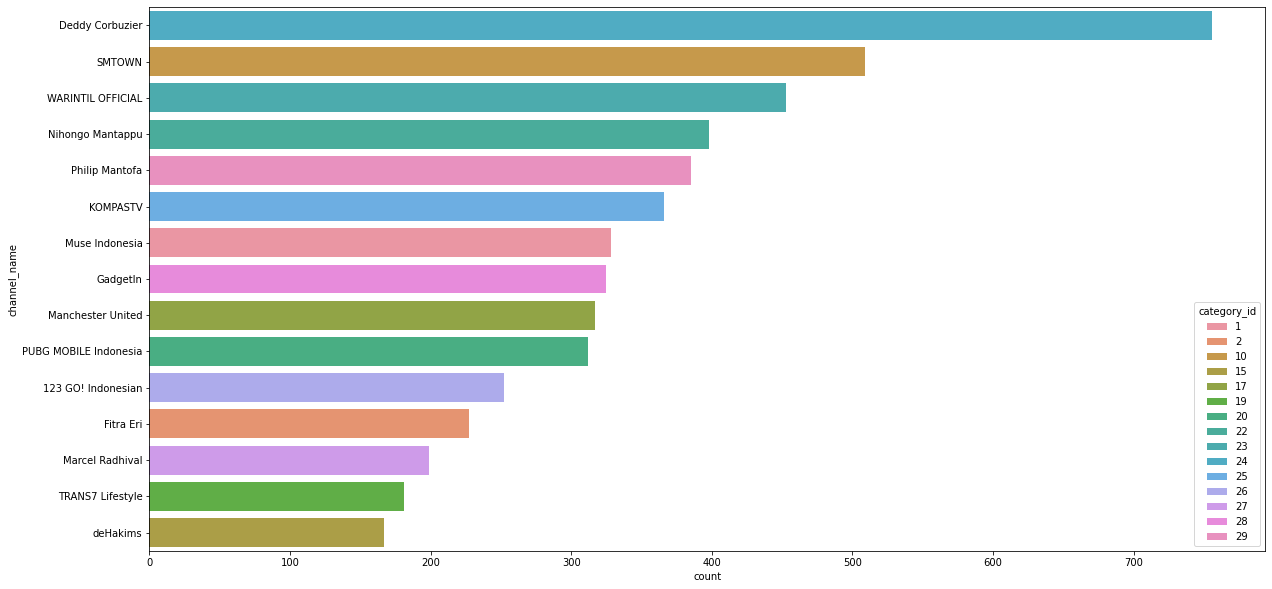

In [80]:
# Plotting
plt.figure(figsize=(20,10))
sns.barplot(x='count', y='channel_name', hue='category_id', orient='h', data=channnel_group_mode, dodge=False)
plt.show()

> Informasi terkait id kategori dapat dilihat dibawah sini

- 2 - Autos & Vehicles
- 1 -  Film & Animation
- 10 - Music
- 15 - Pets & Animals
- 17 - Sports
- 18 - Short Movies
- 19 - Travel & Events
- 20 - Gaming
- 21 - Videoblogging
- 22 - People & Blogs
- 23 - Comedy
- 24 - Entertainment
- 25 - News & Politics
- 26 - Howto & Style
- 27 - Education
- 28 - Science & Technology
- 29 - Nonprofits & Activism
- 30 - Movies
- 31 - Anime/Animation
- 32 - Action/Adventure
- 33 - Classics
- 34 - Comedy
- 35 - Documentary
- 36 - Drama
- 37 - Family
- 38 - Foreign
- 39 - Horror
- 40 - Sci-Fi/Fantasy
- 41 - Thriller
- 42 - Shorts
- 43 - Shows
- 44 - Trailers

### Perbandingan rata-rata like, dislike dan comment berdasarkan suatu kategori video

In [103]:
# Grouping by likem dislike and comment based on category id
ldc_group = data[['like', 'dislike', 'comment', 'category_id']].copy()
ldc_group.groupby(['category_id'], as_index=False).mean()

,category_id,like,dislike,comment
0,1,144702.903799,3287.402701,5369.469223
1,2,17736.597776,2216.430289,1823.848921
2,10,314872.198977,5180.168312,40125.187478
3,15,156862.099057,3831.761464,3334.836478
4,17,122936.830079,3335.378946,3045.211229
5,19,49553.136171,2158.367534,1286.529274
6,20,74138.095926,3978.995316,4833.305826
7,22,150991.036079,5107.267865,5647.165635
8,23,299289.290488,10471.875796,3473.338435
9,24,146611.079030,4166.151875,8464.595333


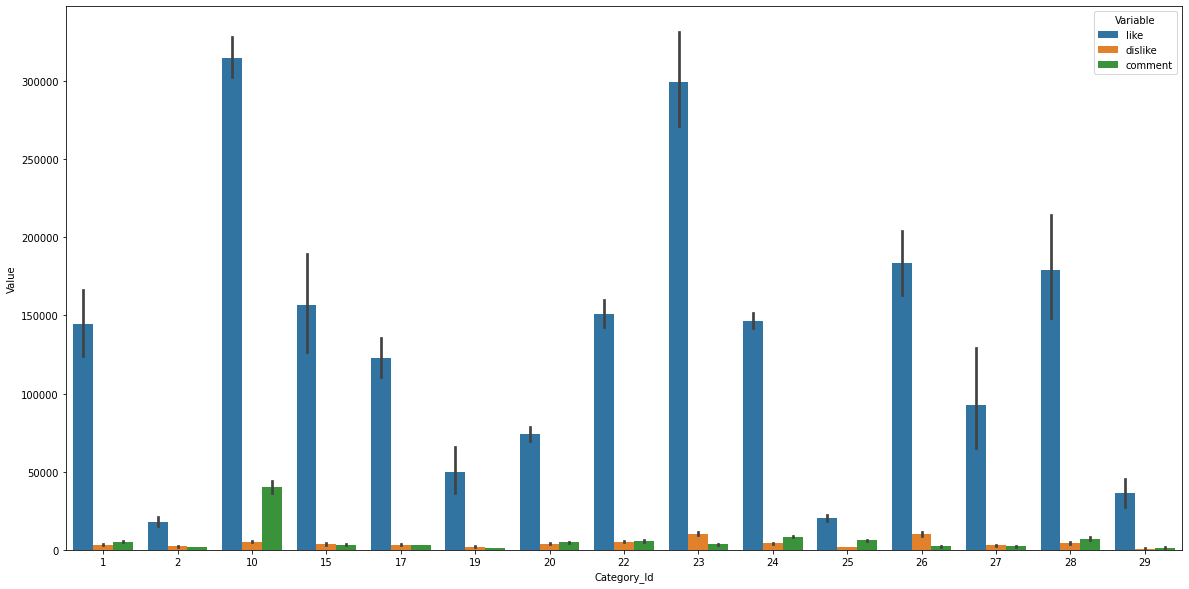

In [112]:
# Plotting
plt.figure(figsize=(20,10))
tidy = ldc_group.melt(id_vars='category_id').rename(columns=str.title)
sns.barplot(x='Category_Id', y='Value', hue='Variable',data=tidy)
plt.show()

### Rata rata waktu yang dibutuhkan oleh suatu video dari pertama kali di publish hingga trending

In [114]:
# Copy specific column
pub_tren_group = data[['publish_time', 'trending_time']].copy()
pub_tren_group['interval'] = 0
pub_tren_group.head()

,publish_time,trending_time,interval
0,2021-02-05T09:00:34Z,2021-02-07 05:46:51.832614+00:00,0
1,2021-02-04T15:54:08Z,2021-02-07 05:46:51.832649+00:00,0
2,2021-02-06T03:00:22Z,2021-02-07 05:46:51.832664+00:00,0
3,2021-02-05T20:26:08Z,2021-02-07 05:46:51.832678+00:00,0
4,2021-02-03T23:14:54Z,2021-02-07 05:46:51.832730+00:00,0


In [135]:
# Finding interval
for i in range(len(pub_tren_group['publish_time'])):
    pub_tren_group['interval'][i] = parse_interval(pub_tren_group['publish_time'][i], pub_tren_group['trending_time'][i])
pub_tren_group

,publish_time,trending_time,interval
0,2021-02-05T09:00:34Z,2021-02-07 05:46:51.832614+00:00,1.611778e+05
1,2021-02-04T15:54:08Z,2021-02-07 05:46:51.832649+00:00,2.227638e+05
2,2021-02-06T03:00:22Z,2021-02-07 05:46:51.832664+00:00,9.638983e+04
3,2021-02-05T20:26:08Z,2021-02-07 05:46:51.832678+00:00,1.200438e+05
4,2021-02-03T23:14:54Z,2021-02-07 05:46:51.832730+00:00,2.827178e+05
...,...,...,...
87167,2022-05-24T09:00:20Z,2022-06-09 06:01:40.747651+00:00,1.371681e+06
87168,2022-05-12T12:30:00Z,2022-06-09 06:01:40.747669+00:00,2.395901e+06
87169,2022-05-06T11:30:09Z,2022-06-09 06:01:40.747687+00:00,2.917892e+06
87170,2022-05-11T04:01:25Z,2022-06-09 06:01:40.747705+00:00,2.512816e+06


In [142]:
# Finding interval in seconds

intv_max = pub_tren_group['interval'].max()
intv_mean = pub_tren_group['interval'].mean()
intv_min = pub_tren_group['interval'].min()

print(f"maximal waktu yang dibutuhkan untuk trending adalah: {dt.timedelta(seconds=intv_max)}")
print(f"minimal waktu yang dibutuhkan untuk trending adalah: {dt.timedelta(seconds=intv_min)}")
print(f"rata-rata waktu yang dibutuhkan untuk trending adalah: {dt.timedelta(seconds=intv_mean)}")

maximal waktu yang dibutuhkan untuk trending adalah: 36 days, 22:02:50.670494
minimal waktu yang dibutuhkan untuk trending adalah: 4:27:02.851424
rata-rata waktu yang dibutuhkan untuk trending adalah: 6 days, 22:01:28.855256


### Kata yang sering digunakan pada title video trending

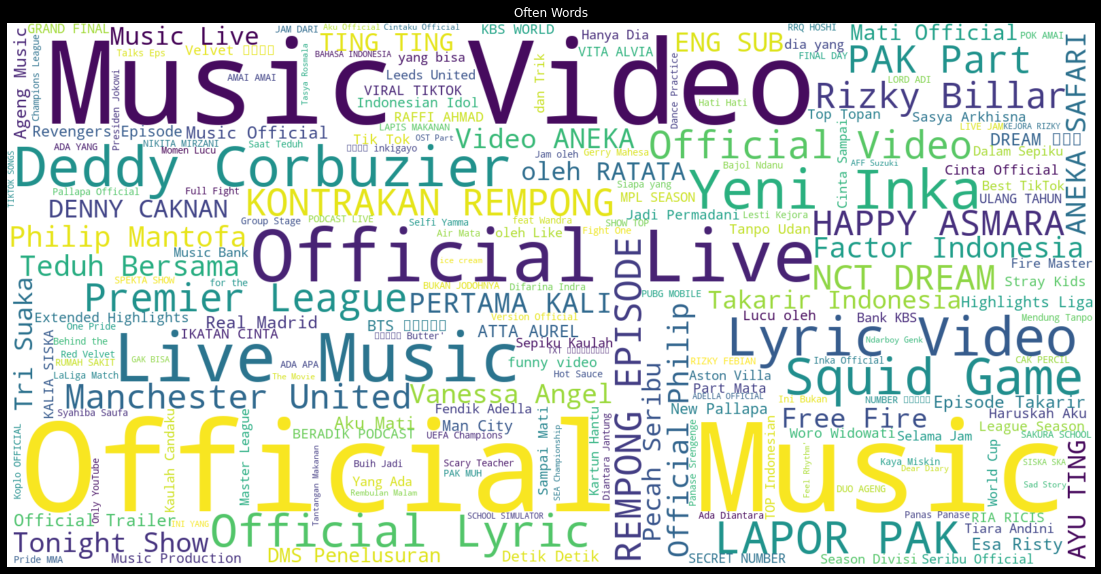

In [145]:
text = ""
for i in range(data.shape[0]):
    text += data.iloc[i]['title']

wordcloud = WordCloud(background_color='white',width=1600,height=800,stopwords='indonesian',min_word_length=3,collocations=True).generate(text)
plt.figure(figsize=(20,10),facecolor='k')
plt.axis("off")
plt.title('Often Words',color='white')
plt.imshow(wordcloud,interpolation='bilinear')
plt.show()